In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import decomposition

In [2]:
data = pd.DataFrame(pd.read_csv("NewFinalSample.csv"))

In [3]:
data.shape

(10000, 23)

In [4]:
data.head()

,RecipeId,Name,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,...,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,minimum_rating,maximum_rating,mean_of_rating
0,100335,Scrumptious Cheeseburger Ring,One Dish Meal,5.0,9.0,345.8,13.9,6.3,71.3,839.7,...,19.2,8.0,30,30,60,average,8,4.0,5.0,4.777778
1,317485,Mom's Comfort Chicken,One Dish Meal,5.0,15.0,305.5,15.9,3.4,80.7,1073.1,...,29.0,4.0,15,15,30,average,9,4.0,5.0,4.666667
2,136091,Hamburg Gravy,Deer,5.0,14.0,145.8,8.6,3.3,38.6,620.3,...,11.8,6.0,10,10,20,average,6,4.0,5.0,4.571429
3,206216,Gluten-Free Fried Mozzarella Sticks,Lunch/Snacks,5.0,9.0,367.3,24.8,13.4,185.1,1291.5,...,25.2,5.0,10,10,20,average,12,4.0,5.0,4.777778
4,221178,Cream Cheese Sugar Cookies,Drop Cookies,5.0,8.0,85.9,2.9,0.8,17.1,63.3,...,1.2,36.0,15,10,25,average,7,0.0,5.0,4.375000


In [5]:
data = data.drop(['RecipeId', 'Name', "RecipeCategory", 'minimum_rating', 'maximum_rating'], axis=1)

In [6]:
data.head()

,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,mean_of_rating
0,5.0,9.0,345.8,13.9,6.3,71.3,839.7,35.6,2.8,5.5,19.2,8.0,30,30,60,average,8,4.777778
1,5.0,15.0,305.5,15.9,3.4,80.7,1073.1,11.7,1.1,2.1,29.0,4.0,15,15,30,average,9,4.666667
2,5.0,14.0,145.8,8.6,3.3,38.6,620.3,4.6,1.1,1.2,11.8,6.0,10,10,20,average,6,4.571429
3,5.0,9.0,367.3,24.8,13.4,185.1,1291.5,10.4,1.6,5.6,25.2,5.0,10,10,20,average,12,4.777778
4,5.0,8.0,85.9,2.9,0.8,17.1,63.3,13.8,0.2,7.0,1.2,36.0,15,10,25,average,7,4.375000


In [7]:
data.shape
corr = data.corr()

In [8]:
corr

,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,IngredientsCount,mean_of_rating
AggregatedRating,1.000000,0.057778,-0.007784,0.029467,0.019952,-0.020346,0.000578,-0.025776,-0.000362,0.030931,-0.041928,-0.018385,-0.092351,0.007147,-0.083049,-0.018900,0.615663
ReviewCount,0.057778,1.000000,0.000163,0.002785,0.012019,0.023163,0.039464,-0.004195,-0.031465,0.003618,0.010819,0.020218,0.018239,0.002108,0.017751,0.020170,-0.013454
Calories,-0.007784,0.000163,1.000000,0.838398,0.719106,0.621085,0.553283,0.555319,0.312729,0.093694,0.703058,-0.220785,0.128121,0.082020,0.148354,0.247145,-0.012064
FatContent,0.029467,0.002785,0.838398,1.000000,0.857452,0.591894,0.456880,0.160627,0.132983,-0.036047,0.534172,-0.149889,0.095296,0.068863,0.113376,0.188110,0.004835
SaturatedFatContent,0.019952,0.012019,0.719106,0.857452,1.000000,0.588045,0.391096,0.161032,0.048368,-0.008292,0.424417,-0.103725,0.081343,0.042586,0.090523,0.128116,-0.004962
CholesterolContent,-0.020346,0.023163,0.621085,0.591894,0.588045,1.000000,0.429886,0.025564,-0.074970,-0.106074,0.736603,-0.171956,0.131409,0.068079,0.146422,0.177030,-0.035362
SodiumContent,0.000578,0.039464,0.553283,0.456880,0.391096,0.429886,1.000000,0.230575,0.214709,-0.134113,0.541150,-0.194673,0.155929,0.083476,0.175163,0.247021,-0.014761
CarbohydrateContent,-0.025776,-0.004195,0.555319,0.160627,0.161032,0.025564,0.230575,1.000000,0.520145,0.418920,0.082490,-0.083597,0.021018,0.033614,0.031274,0.189782,-0.025986
FiberContent,-0.000362,-0.031465,0.312729,0.132983,0.048368,-0.074970,0.214709,0.520145,1.000000,0.046696,0.107243,-0.191079,0.053008,0.001717,0.049247,0.258318,0.023742
SugarContent,0.030931,0.003618,0.093694,-0.036047,-0.008292,-0.106074,-0.134113,0.418920,0.046696,1.000000,-0.188572,0.095186,0.003572,0.010553,0.007047,0.041641,0.013825


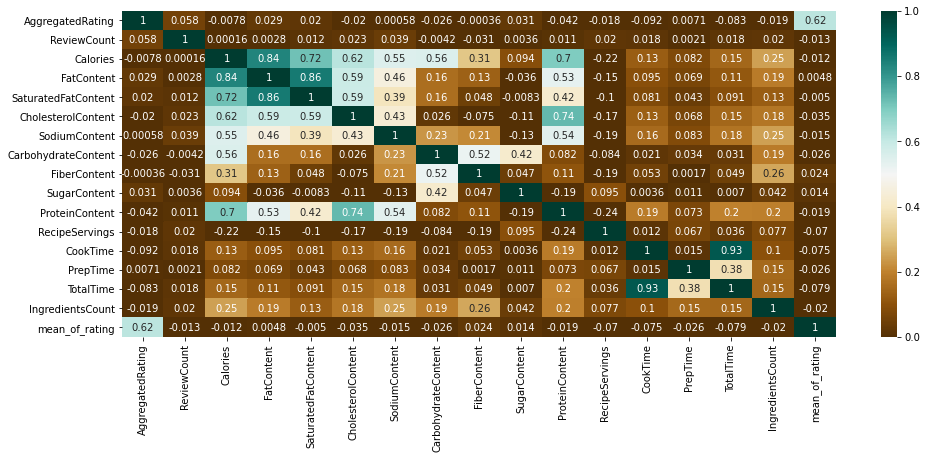

In [9]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True, cmap='BrBG')